# 📘 Linear Discriminant Analysis (LDA): Breast Cancer Classification

## 📌 Introduction
In this notebook, we will apply **Linear Discriminant Analysis (LDA)** to the **Breast Cancer dataset** from `sklearn.datasets`. We will:
✅ Load and explore the dataset 📊  
✅ Preprocess the data 🔧  
✅ Train an **LDA model** for classification 🤖  
✅ Compare its performance with **Logistic Regression** 📈  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Standarize feature
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=42)

LDA Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



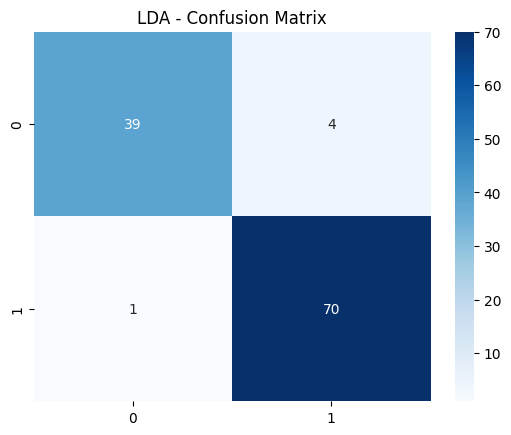

In [5]:
## 🌍 Step 3: Train LDA for Classification

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

#predict 
y_pred_lda = lda.predict(X_test)

#Evaluation
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

sns.heatmap(confusion_matrix(y_test, y_pred_lda), annot=True, fmt='d', cmap='Blues')
plt.title("LDA - Confusion Matrix")
plt.show()

LDA Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



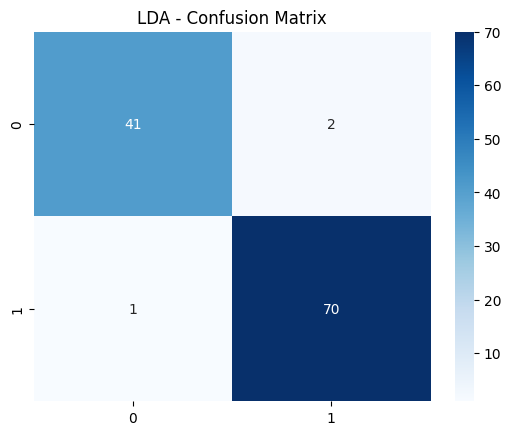

In [6]:
## 🔍 Step 4: Compare LDA with Logistic Regression

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#predict 
y_pred_lr = model.predict(X_test)

#Evaluation
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("LDA - Confusion Matrix")
plt.show()

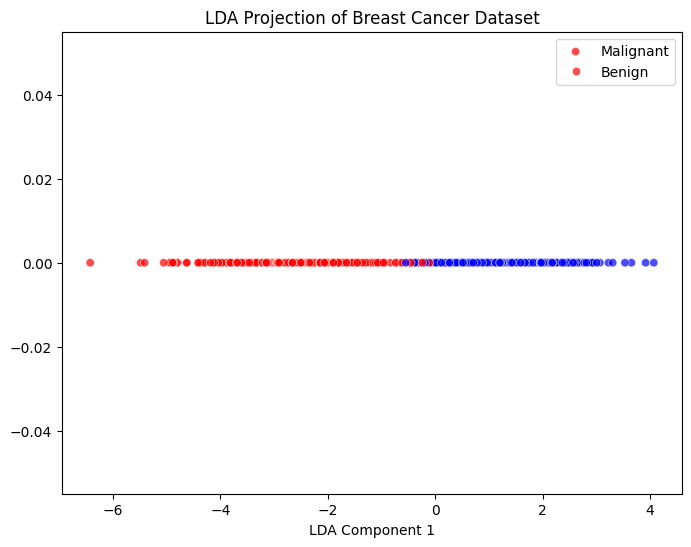

In [9]:
## 📈 Step 5: Visualizing the LDA Projection
X_lda = lda.transform(X_Scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_lda[:, 0], y=np.zeros_like(X_lda[:, 0]), hue=y, palette=['red', 'blue'], alpha=0.7)
plt.xlabel("LDA Component 1")
plt.title("LDA Projection of Breast Cancer Dataset")
plt.legend(labels=['Malignant', 'Benign'])
plt.show()


## 📌 Conclusion
- **LDA effectively reduces dimensionality while preserving class separation.**
- **Compared to Logistic Regression, LDA provides similar performance but offers better interpretability for classification problems.**
- **LDA can be useful when data follows a Gaussian distribution within each class.**

🚀 **Next Steps:** Try LDA with more datasets and compare it with PCA!
